Kullandığım veri seti veri seti, 18.000'den fazla şarkıya ait ses özellikleri ve şarkı sözleri içermektedir. Hayata geçirmeye çalıştığım fikir ; Müzik platformlarından elde edilen kullanıcı dinleme verileri ile kullanıcıları analiz edip müzik tercihlerini kümeleyebilmekti.Bu projede müziğe olan ilgilere göre kullanıcıları gruplandırarak (Unsupervised) ve onlara öneriler sunacak modeller geliştirmeyi hedeflemiştim (Supervised).

Projeme veriyi temizlemek, işlemek ve görselleştirmek için gerekli kütüphanelerimizi dahil ederek projeme başladım.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

veri kümemi çalışma ortamına dahil ettim.

In [2]:
df = pd.read_csv('spotify_songs.csv')

Numerical EDA

Veriyi nümerik olarak özetleme yaklaşımı olarak birkaç tane pandas metodu kullanıyorum.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18454 entries, 0 to 18453
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  18454 non-null  object 
 1   track_name                18454 non-null  object 
 2   track_artist              18454 non-null  object 
 3   lyrics                    18194 non-null  object 
 4   track_popularity          18454 non-null  int64  
 5   track_album_id            18454 non-null  object 
 6   track_album_name          18454 non-null  object 
 7   track_album_release_date  18454 non-null  object 
 8   playlist_name             18454 non-null  object 
 9   playlist_id               18454 non-null  object 
 10  playlist_genre            18454 non-null  object 
 11  playlist_subgenre         18454 non-null  object 
 12  danceability              18454 non-null  float64
 13  energy                    18454 non-null  float64
 14  key   

df.info(), veriye dair genel bir bilgi edinmemi sağlıyor. Burada özelliklerin isimlerini, kaç satır ve sütünluk bir veri kümem olduğunu görebiliyorum. 18454 satır ve 25 sütundan oluşan bir veri kümemiz var. Bu kümedeki 24 değişkeni tahminleyici olarak, 1 değişkeni(parti) ise hedef değişken olarak kullanacağız. 18454x25 verinin tamamının non-null olduğunu görüyoruz ki bu önemli, çünkü numpy, pandas, scikit-learn gibi kütüphanelerin doğru çalışması için bütün verinin non-null ve aynı tipte olması gerekmektedir.

In [4]:
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000
mean,42.438821,0.644066,0.692289,5.342094,-6.769159,0.580525,0.106192,0.175348,0.051216,0.189593,0.520598,120.812167,230319.306763
std,24.616740,0.150071,0.180635,3.613121,2.920757,0.493487,0.102291,0.217795,0.168263,0.153751,0.228716,27.586424,57255.086685
min,0.000000,0.098500,0.016700,0.000000,-34.283000,0.000000,0.022400,0.000001,0.000000,0.009360,0.000010,37.114000,31893.000000
25%,24.000000,0.546000,0.573000,2.000000,-8.249000,0.000000,0.039700,0.016100,0.000000,0.092700,0.345000,98.856000,193230.250000
50%,48.000000,0.660000,0.715000,6.000000,-6.227000,1.000000,0.060300,0.081900,0.000009,0.128000,0.522000,120.045000,221340.000000
75%,62.000000,0.755000,0.835000,9.000000,-4.719000,1.000000,0.130000,0.254000,0.001720,0.246000,0.700000,135.984000,258078.250000
max,100.000000,0.979000,1.000000,11.000000,1.275000,1.000000,0.918000,0.992000,0.987000,0.996000,0.991000,214.047000,517810.000000


df.describe() ise, info ile aldığım genel bilgiye dair başka bir özet sunar. Her bir değişkenden kaç adet olduğu veya bu değişkenlerin değerlerinin kaça ayrıldığı gibi.

In [5]:
df.head()

,track_id,track_name,track_artist,lyrics,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,language
0,0017A6SJgTbfQVU2EtsPNo,Pangarap,Barbie's Cradle,Minsan pa Nang ako'y napalingon Hindi ko alam ...,41,1srJQ0njEQgd8w4XSqI4JQ,Trip,2001-01-01,Pinoy Classic Rock,37i9dQZF1DWYDQ8wBxd7xt,...,-10.068,1,0.0236,0.27900,0.01170,0.0887,0.566,97.091,235440,tl
1,004s3t0ONYlzxII9PLgU6z,I Feel Alive,Steady Rollin,"The trees, are singing in the wind The sky blu...",28,3z04Lb9Dsilqw68SHt6jLB,Love & Loss,2017-11-21,Hard Rock Workout,3YouF0u7waJnolytf9JCXf,...,-4.739,1,0.0442,0.01170,0.00994,0.3470,0.404,135.225,373512,en
2,00chLpzhgVjxs1zKC9UScL,Poison,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U...",0,6oZ6brjB8x3GoeSYdwJdPc,Gold,2005-01-01,"Back in the day - R&B, New Jack Swing, Swingbe...",3a9y4eeCJRmG9p4YKfqYIx,...,-7.504,0,0.2160,0.00432,0.00723,0.4890,0.650,111.904,262467,en
3,00cqd6ZsSkLZqGMlQCR0Zo,Baby It's Cold Outside (feat. Christina Aguilera),CeeLo Green,I really can't stay Baby it's cold outside I'v...,41,3ssspRe42CXkhPxdc12xcp,CeeLo's Magic Moment,2012-10-29,Christmas Soul,6FZYc2BvF7tColxO8PBShV,...,-5.819,0,0.0341,0.68900,0.00000,0.0664,0.405,118.593,243067,en
4,00emjlCv9azBN0fzuuyLqy,Dumb Litty,KARD,Get up out of my business You don't keep me fr...,65,7h5X3xhh3peIK9Y0qI5hbK,KARD 2nd Digital Single ‘Dumb Litty’,2019-09-22,K-Party Dance Mix,37i9dQZF1DX4RDXswvP6Mj,...,-1.993,1,0.0409,0.03700,0.00000,0.1380,0.240,130.018,193160,en


In [7]:
df.dtypes

,0
track_id,object
track_name,object
track_artist,object
lyrics,object
track_popularity,int64
track_album_id,object
track_album_name,object
track_album_release_date,object
playlist_name,object
playlist_id,object


In [8]:
df.columns

Index(['track_id', 'track_name', 'track_artist', 'lyrics', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'language'],
      dtype='object')

In [9]:
import pandas as pd
df = pd.read_csv('spotify_songs.csv')
df.head()

,track_id,track_name,track_artist,lyrics,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,language
0,0017A6SJgTbfQVU2EtsPNo,Pangarap,Barbie's Cradle,Minsan pa Nang ako'y napalingon Hindi ko alam ...,41,1srJQ0njEQgd8w4XSqI4JQ,Trip,2001-01-01,Pinoy Classic Rock,37i9dQZF1DWYDQ8wBxd7xt,...,-10.068,1,0.0236,0.27900,0.01170,0.0887,0.566,97.091,235440,tl
1,004s3t0ONYlzxII9PLgU6z,I Feel Alive,Steady Rollin,"The trees, are singing in the wind The sky blu...",28,3z04Lb9Dsilqw68SHt6jLB,Love & Loss,2017-11-21,Hard Rock Workout,3YouF0u7waJnolytf9JCXf,...,-4.739,1,0.0442,0.01170,0.00994,0.3470,0.404,135.225,373512,en
2,00chLpzhgVjxs1zKC9UScL,Poison,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U...",0,6oZ6brjB8x3GoeSYdwJdPc,Gold,2005-01-01,"Back in the day - R&B, New Jack Swing, Swingbe...",3a9y4eeCJRmG9p4YKfqYIx,...,-7.504,0,0.2160,0.00432,0.00723,0.4890,0.650,111.904,262467,en
3,00cqd6ZsSkLZqGMlQCR0Zo,Baby It's Cold Outside (feat. Christina Aguilera),CeeLo Green,I really can't stay Baby it's cold outside I'v...,41,3ssspRe42CXkhPxdc12xcp,CeeLo's Magic Moment,2012-10-29,Christmas Soul,6FZYc2BvF7tColxO8PBShV,...,-5.819,0,0.0341,0.68900,0.00000,0.0664,0.405,118.593,243067,en
4,00emjlCv9azBN0fzuuyLqy,Dumb Litty,KARD,Get up out of my business You don't keep me fr...,65,7h5X3xhh3peIK9Y0qI5hbK,KARD 2nd Digital Single ‘Dumb Litty’,2019-09-22,K-Party Dance Mix,37i9dQZF1DX4RDXswvP6Mj,...,-1.993,1,0.0409,0.03700,0.00000,0.1380,0.240,130.018,193160,en


In [10]:
df.head()

,track_id,track_name,track_artist,lyrics,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,language
0,0017A6SJgTbfQVU2EtsPNo,Pangarap,Barbie's Cradle,Minsan pa Nang ako'y napalingon Hindi ko alam ...,41,1srJQ0njEQgd8w4XSqI4JQ,Trip,2001-01-01,Pinoy Classic Rock,37i9dQZF1DWYDQ8wBxd7xt,...,-10.068,1,0.0236,0.27900,0.01170,0.0887,0.566,97.091,235440,tl
1,004s3t0ONYlzxII9PLgU6z,I Feel Alive,Steady Rollin,"The trees, are singing in the wind The sky blu...",28,3z04Lb9Dsilqw68SHt6jLB,Love & Loss,2017-11-21,Hard Rock Workout,3YouF0u7waJnolytf9JCXf,...,-4.739,1,0.0442,0.01170,0.00994,0.3470,0.404,135.225,373512,en
2,00chLpzhgVjxs1zKC9UScL,Poison,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U...",0,6oZ6brjB8x3GoeSYdwJdPc,Gold,2005-01-01,"Back in the day - R&B, New Jack Swing, Swingbe...",3a9y4eeCJRmG9p4YKfqYIx,...,-7.504,0,0.2160,0.00432,0.00723,0.4890,0.650,111.904,262467,en
3,00cqd6ZsSkLZqGMlQCR0Zo,Baby It's Cold Outside (feat. Christina Aguilera),CeeLo Green,I really can't stay Baby it's cold outside I'v...,41,3ssspRe42CXkhPxdc12xcp,CeeLo's Magic Moment,2012-10-29,Christmas Soul,6FZYc2BvF7tColxO8PBShV,...,-5.819,0,0.0341,0.68900,0.00000,0.0664,0.405,118.593,243067,en
4,00emjlCv9azBN0fzuuyLqy,Dumb Litty,KARD,Get up out of my business You don't keep me fr...,65,7h5X3xhh3peIK9Y0qI5hbK,KARD 2nd Digital Single ‘Dumb Litty’,2019-09-22,K-Party Dance Mix,37i9dQZF1DX4RDXswvP6Mj,...,-1.993,1,0.0409,0.03700,0.00000,0.1380,0.240,130.018,193160,en


Visual EDA

Bir önceki adımda nümerik olarak gördüğüm veri kümemi bu adımda da görsel olarak gözlemliyorum.

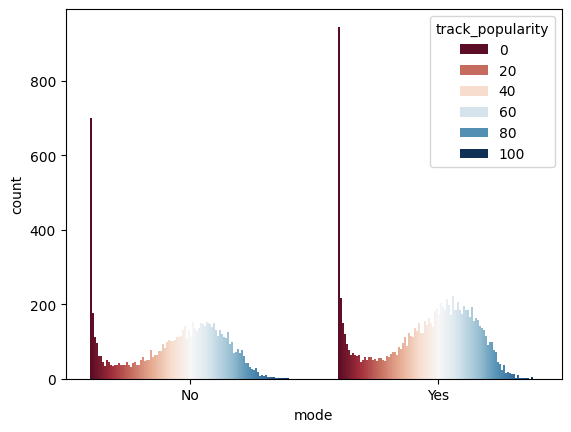

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('spotify_songs.csv')
plt.figure()
sns.countplot(x='mode', hue='track_popularity', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

In [12]:
df.isnull().sum()

,0
track_id,0
track_name,0
track_artist,0
lyrics,260
track_popularity,0
track_album_id,0
track_album_name,0
track_album_release_date,0
playlist_name,0
playlist_id,0


<Axes: >

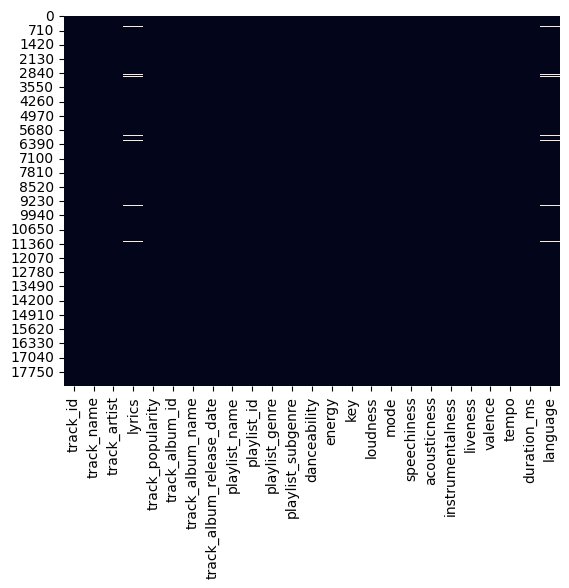

In [13]:
sns.heatmap(df.isnull(),cbar=False)

In [14]:
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000
mean,42.438821,0.644066,0.692289,5.342094,-6.769159,0.580525,0.106192,0.175348,0.051216,0.189593,0.520598,120.812167,230319.306763
std,24.616740,0.150071,0.180635,3.613121,2.920757,0.493487,0.102291,0.217795,0.168263,0.153751,0.228716,27.586424,57255.086685
min,0.000000,0.098500,0.016700,0.000000,-34.283000,0.000000,0.022400,0.000001,0.000000,0.009360,0.000010,37.114000,31893.000000
25%,24.000000,0.546000,0.573000,2.000000,-8.249000,0.000000,0.039700,0.016100,0.000000,0.092700,0.345000,98.856000,193230.250000
50%,48.000000,0.660000,0.715000,6.000000,-6.227000,1.000000,0.060300,0.081900,0.000009,0.128000,0.522000,120.045000,221340.000000
75%,62.000000,0.755000,0.835000,9.000000,-4.719000,1.000000,0.130000,0.254000,0.001720,0.246000,0.700000,135.984000,258078.250000
max,100.000000,0.979000,1.000000,11.000000,1.275000,1.000000,0.918000,0.992000,0.987000,0.996000,0.991000,214.047000,517810.000000


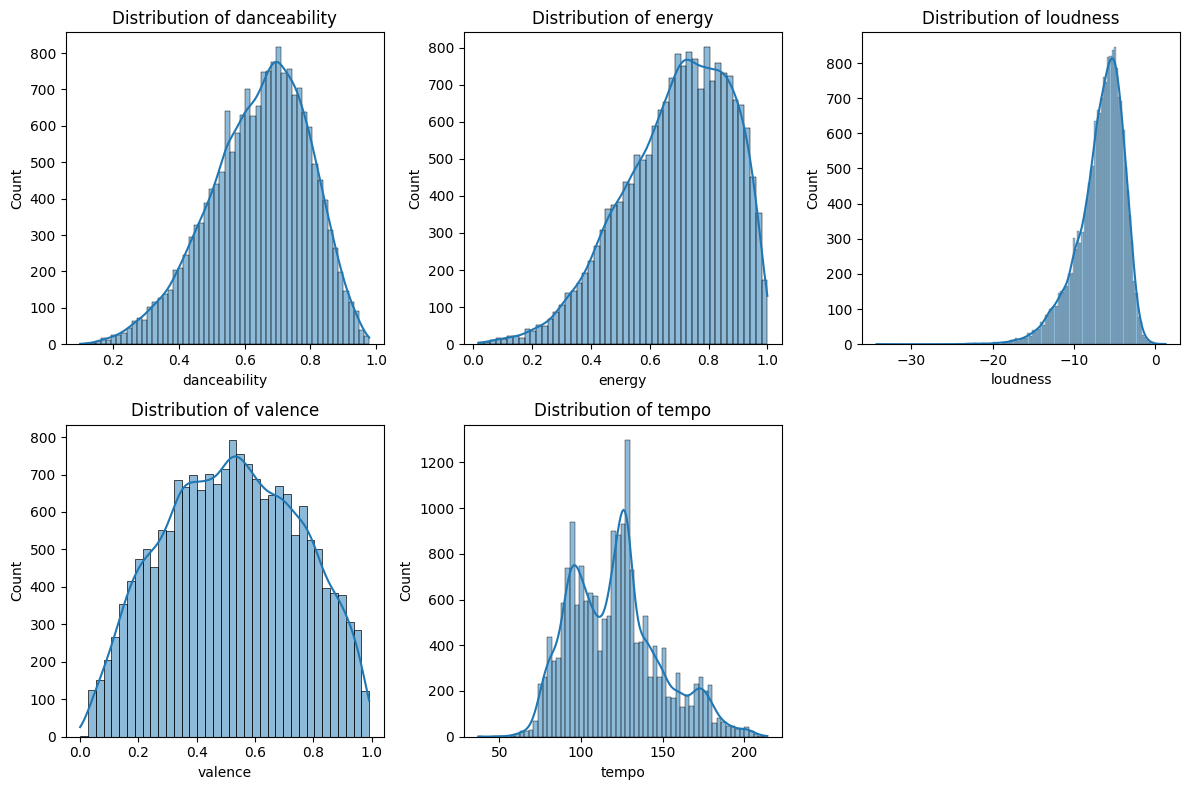

In [15]:
num_cols = ['danceability', 'energy', 'loudness', 'valence', 'tempo']

plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

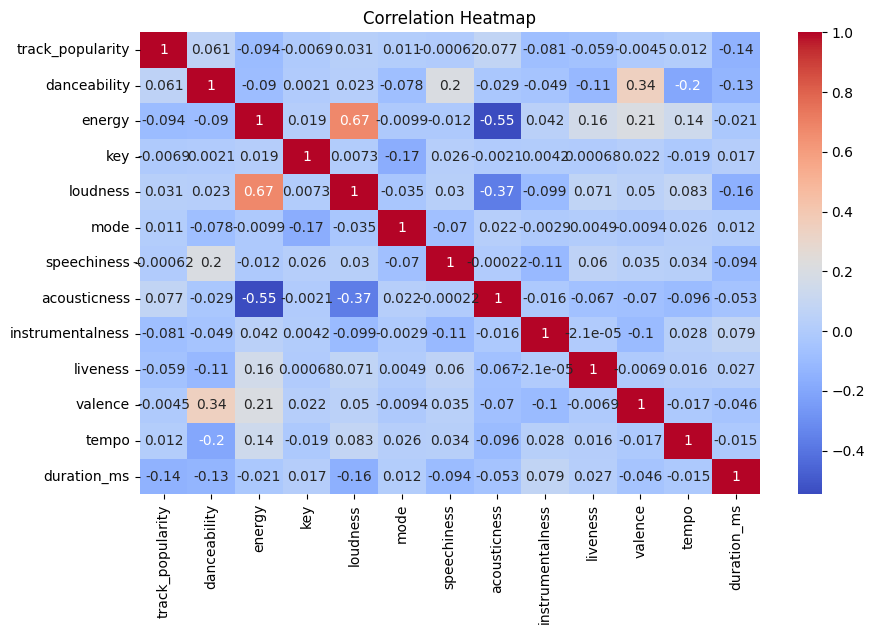

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm') # Select only numeric columns for correlation calculation
plt.title('Correlation Heatmap')
plt.show()

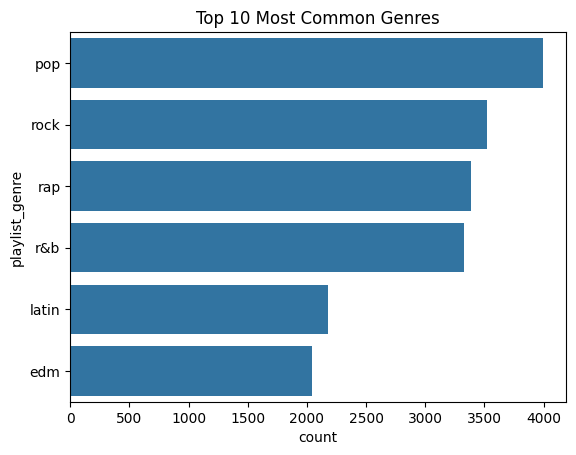

In [17]:
sns.countplot(y='playlist_genre', data=df, order=df['playlist_genre'].value_counts().index[:10])
plt.title('Top 10 Most Common Genres')
plt.show()

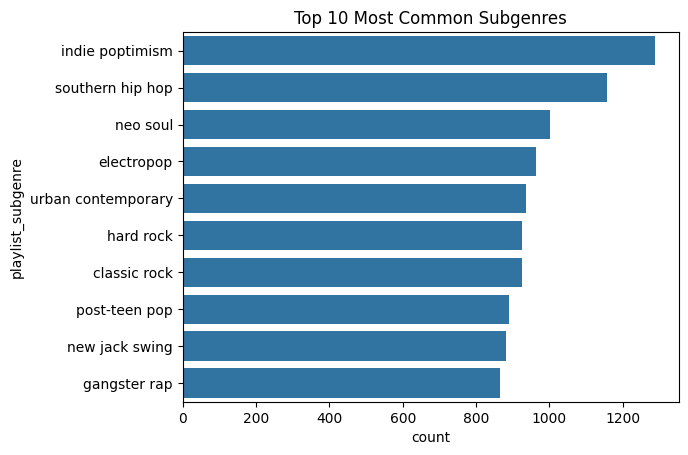

In [18]:
sns.countplot(y='playlist_subgenre', data=df, order=df['playlist_subgenre'].value_counts().index[:10])
plt.title('Top 10 Most Common Subgenres')
plt.show()

kNN algoritması eğitim kümesini inceliyor, tahmin yapmak için tüm veri kümesindeki en yakın komşuları arıyor. Şimdi algoritmamdaki çalışma ortamıma dahil ediyorum.

In [19]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values='?', strategy='most_frequent')

scikit-learn kütüphanesi kullanarak kNN algoritmamı çağırdık ve karar verirken kullanacağı komşuluk değerini gösteren n_neighbors parametresini 2 olarak belirleyerek knn_model adını verdiğim değişkeni tanımladım.

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=2)

Adımlarımı Python tuple’larından oluşan bir liste şeklinde kümelemiş oldum. Tanımlamış olduğumuz steps değişkenini tahminleme sürecini adım adım kodlamak yerine bir pipeline oluşturmak için kullanacağım.

In [21]:
steps = [('imputation', imputer),
('knn', knn_model)]

In [22]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps)

sklearn.pipeline metodunu kullanarak algoritmamı, parametrelerimi, veri önişleme adımlarımı tek bir değişken (steps adını verdiğim) içerisinde gruplayarak daha derli toplu bir kod oluşturmuş oldum.

In [23]:
from sklearn.model_selection import train_test_split
y = df['track_popularity'].values
X = df.drop('track_popularity', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
df[df == 'n'] = 0
df[df == 'y'] = 1

Elimdeki veri kümesinden eğitim ve test kümeleri oluşturuyorum. Bunun için train_test_split metodunu kullanıyorum. Ayrıca ‘track_popularity’ özelliğini hedef, diğer özellikleri ise tahminleyici olarak belirliyorum.

Veri kümemizdeki her bir verinin ‘track_popularity’ değerlerini y değişkenine atadım. Ardından veri kümemde bu değerleri düşürerek geri kalan değerleri X değişkenine atamış oldum. Böylelikle tahminleyici ve hedef değişkenlerimizi oluşturmuş oldum.

Ardından train_test_split metodunu kullanarak verimi train ve test olarak ikiye ayırdım. Ayırırken, test_size parametresiyle test kümemin büyüklüğünü tüm verinin %30'u olarak belirledim. Geri kalanı da eğitim(train) verisi olarak ayırmış oldum.


random_state, basitçe veriyi bölmeden önce karıştırma(shuffle) için kullandığımız bir tam sayı parametresidir.Genellikle bu parametrenin 42'ye eşitlendiğini gördüm.


In [24]:
df.columns

Index(['track_id', 'track_name', 'track_artist', 'lyrics', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'language'],
      dtype='object')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18454 entries, 0 to 18453
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  18454 non-null  object 
 1   track_name                18454 non-null  object 
 2   track_artist              18454 non-null  object 
 3   lyrics                    18194 non-null  object 
 4   track_popularity          18454 non-null  int64  
 5   track_album_id            18454 non-null  object 
 6   track_album_name          18454 non-null  object 
 7   track_album_release_date  18454 non-null  object 
 8   playlist_name             18454 non-null  object 
 9   playlist_id               18454 non-null  object 
 10  playlist_genre            18454 non-null  object 
 11  playlist_subgenre         18454 non-null  object 
 12  danceability              18454 non-null  float64
 13  energy                    18454 non-null  float64
 14  key   

In [26]:
from sklearn.preprocessing import StandardScaler


num_features = ['danceability', 'energy', 'loudness', 'valence', 'tempo']


scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])

In [27]:
from sklearn.model_selection import train_test_split


X = df.drop(columns=['playlist_genre'])
y = df['playlist_genre']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder()
playlist_genre_encoded = encoder.fit_transform(df[['playlist_genre']])


X = df.drop(columns=['playlist_genre'])
X = pd.concat([X, pd.DataFrame(playlist_genre_encoded.toarray())], axis=1)

In [29]:
print(X.columns)

Index([                'track_id',               'track_name',
                   'track_artist',                   'lyrics',
               'track_popularity',           'track_album_id',
               'track_album_name', 'track_album_release_date',
                  'playlist_name',              'playlist_id',
              'playlist_subgenre',             'danceability',
                         'energy',                      'key',
                       'loudness',                     'mode',
                    'speechiness',             'acousticness',
               'instrumentalness',                 'liveness',
                        'valence',                    'tempo',
                    'duration_ms',                 'language',
                                0,                          1,
                                2,                          3,
                                4,                          5],
      dtype='object')


In [30]:
print(X.head())

                 track_id                                         track_name  \
0  0017A6SJgTbfQVU2EtsPNo                                           Pangarap   
1  004s3t0ONYlzxII9PLgU6z                                       I Feel Alive   
2  00chLpzhgVjxs1zKC9UScL                                             Poison   
3  00cqd6ZsSkLZqGMlQCR0Zo  Baby It's Cold Outside (feat. Christina Aguilera)   
4  00emjlCv9azBN0fzuuyLqy                                         Dumb Litty   

      track_artist                                             lyrics  \
0  Barbie's Cradle  Minsan pa Nang ako'y napalingon Hindi ko alam ...   
1    Steady Rollin  The trees, are singing in the wind The sky blu...   
2   Bell Biv DeVoe  NA Yeah, Spyderman and Freeze in full effect U...   
3      CeeLo Green  I really can't stay Baby it's cold outside I'v...   
4             KARD  Get up out of my business You don't keep me fr...   

   track_popularity          track_album_id  \
0                41  1srJQ0njEQgd

In [31]:
X.columns = X.columns.astype(str)

Sayısal sütunlarımı seçiyorum. Modeli tanımlıyorum. K-Fold çapraz doğrulamasını gerçekleştiriyorum. KMeans'i Uyguladım.Test seti için küme etiketlerini tahmin ettiriyorum.Bu katlama için silüet puanını hesapladım ve puanları yazdırdım.

In [32]:
X_numeric = X.select_dtypes(include=['float64', 'int64'])

from sklearn.cluster import KMeans
from sklearn.model_selection import KFold
from sklearn.metrics import silhouette_score


kmeans = KMeans(n_clusters=4, random_state=42)


kf = KFold(n_splits=5, shuffle=True, random_state=42)

silhouette_scores = []
for train_index, test_index in kf.split(X_numeric):
    X_train, X_test = X_numeric.iloc[train_index], X_numeric.iloc[test_index]


    kmeans.fit(X_train)


    cluster_labels = kmeans.predict(X_test)


    score = silhouette_score(X_test, cluster_labels)
    silhouette_scores.append(score)


print("Cross-Validation Silhouette Scores:", silhouette_scores)
print("Mean Silhouette Score:", sum(silhouette_scores) / len(silhouette_scores))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

Cross-Validation Silhouette Scores: [0.5266689152148928, 0.5217845565514891, 0.5168407869047142, 0.5228808180456618, 0.5146552180007947]
Mean Silhouette Score: 0.5205660589435105


In [33]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (14764, 19)
y_train shape: (14763,)


In [34]:
print("X_train null values:\n", X_train.isnull().sum())
print("y_train null values:\n", y_train.isnull().sum())

X_train null values:
 track_popularity    0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
0                   0
1                   0
2                   0
3                   0
4                   0
5                   0
dtype: int64
y_train null values:
 0


In [35]:
print("X_train indices:", X_train.index)
print("y_train indices:", y_train.index)

X_train indices: Index([    0,     1,     2,     3,     4,     5,     8,    10,    12,    14,
       ...
       18434, 18438, 18441, 18442, 18445, 18447, 18448, 18449, 18450, 18452],
      dtype='int64', length=14764)
y_train indices: Index([ 1452, 10008, 17426,  2109,  3843,  5290,  5222, 12637,  1365,  4149,
       ...
       11363, 14423,  4426, 16850,  6265, 11284, 11964,  5390,   860, 15795],
      dtype='int64', length=14763)


In [36]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

X_train ve y_train'in eksik indekslerini karşılaştırıyorum

In [37]:
X_train_indices = X_train.index
y_train_indices = y_train.index

missing_in_y_train = X_train_indices.difference(y_train_indices)
missing_in_X_train = y_train_indices.difference(X_train_indices)

print("Missing in y_train:", missing_in_y_train)
print("Missing in X_train:", missing_in_X_train)

Missing in y_train: RangeIndex(start=14763, stop=14764, step=1)
Missing in X_train: RangeIndex(start=0, stop=0, step=1)


Eksik indekslere sahip satırları çıkarıyorum.

In [38]:
X_train_cleaned = X_train.drop(missing_in_y_train)
y_train_cleaned = y_train.drop(missing_in_X_train)

In [39]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

Ortak indeksleri elde ediyorum. Bu ortak indekslere göre veri setlerini filtreledim.

In [40]:
common_indices = X_train.index.intersection(y_train.index)


X_train = X_train.loc[common_indices]
y_train = y_train.loc[common_indices]

In [41]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

Modeli tanımladım.

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


clf = DecisionTreeClassifier(random_state=42)


scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross-Validation Accuracy Scores: [0.17609211 0.17812394 0.1584829  0.17310298 0.18326558]
Mean Accuracy: 0.17381350278115043


%17 lik bir accuracy almış oldum. Bu değerin yükseltilmesi gerekmektedir.

In [43]:
print(y_train.value_counts())

playlist_genre
pop      3187
rock     2820
rap      2711
r&b      2640
latin    1740
edm      1665
Name: count, dtype: int64


In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [45]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross-Validation Accuracy Scores: [0.18489672 0.19607179 0.19031493 0.18224932 0.18699187]
Mean Accuracy: 0.18810492659616743


Accuracymi %18 e yükselttim. Bir yükselme var ama hala bu yükselme oldukça az.

In [46]:
X.dtypes

,0
track_id,object
track_name,object
track_artist,object
lyrics,object
track_popularity,int64
track_album_id,object
track_album_name,object
track_album_release_date,object
playlist_name,object
playlist_id,object


make_scorer'ı içe aktardım. Parametre ızgarasını tanımladım. Izgara Araması Yapıyorum. silhouette_score'dan bir puanlayıcı oluşturmak için make_scorer'ı kullandım. En iyi parametrelere ulaşmaya çalışıyorum.

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import make_scorer, silhouette_score


param_grid = {'n_clusters': [3, 4, 5, 6]}


grid_search = GridSearchCV(KMeans(random_state=42), param_grid, cv=5, scoring=make_scorer(silhouette_score))
grid_search.fit(X)


print("Best Parameters:", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 808, in _score
    scores = scorer(estimator, X_test)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_

Best Parameters: {'n_clusters': 3}


Ek girinti kaldırdım. Sütunun nesne türünde olup olmadığını kontrol ettim.

In [49]:
from sklearn.preprocessing import LabelEncoder


for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

grid_search.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 808, in _score
    scores = scorer(estimator, X_test)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_

GridSearchCV(cv=5, estimator=KMeans(random_state=42),
             param_grid={'n_clusters': [3, 4, 5, 6]},
             scoring=make_scorer(silhouette_score))

Parametre ızgarasını tanımlıyorum. LabelEncoder'ı başlattım. y_train'i fit ve transform ettim. Izgara Araması yapıyorum. Ve son olarak en iyi parametreleri print ediyorum.

In [52]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV


param_grid = {'max_depth': [3, 5, 7, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}


le = LabelEncoder()


y_train = le.fit_transform(y_train)


grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
